In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd

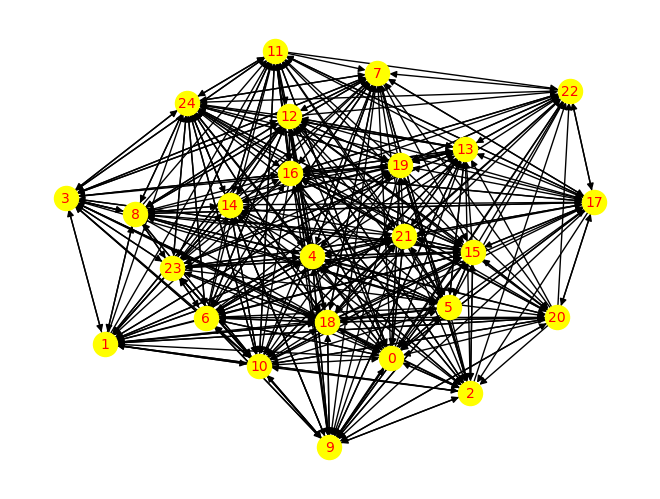

In [2]:
# created a directed graph
graph=nx.gnp_random_graph(25,0.6,directed=True)
#draw a graph
nx.draw(graph,with_labels=True,font_color='red',font_size=10,node_color='yellow')
#plot a graph
plt.show()

In [3]:
#number of nodes for graph
count=graph.number_of_nodes()
#graph neighbours of a node 1
print(list(graph.neighbors(1)))

[2, 3, 4, 8, 10, 11, 12, 14, 18, 19, 20, 21, 24]


In [4]:
#Page Rank Algorithm-Calculating random walk score
#initialising the dictionary which contains key as node and value as random walk score
rank_dict={}
# taking a random node as the starting node:
x=rd.randint(0,25)
#Setting random walk score of each node to zero
for j in range(0,25):
  rank_dict[j]=0
#Incrementing score of starting node
rank_dict[x]=rank_dict[x]+1
#iterating process for 50000 times and updating score
for i in range(500000):
  #storing list of neighboring nodes in list
  list_n=list(graph.neighbors(x))
  #if length of list is zero then taking another node and process starts
  if(len(list_n)==0):
    x=rd.randint(0,25)
    rank_dict[x]=rank_dict[x]+1
  #else choose any node from the list and continue the process by updating score to that node
  else:
    x=rd.choice(list_n)
    rank_dict[x]=rank_dict[x]+1
print("Random Walk Score Updated")

Random Walk Score Updated


In [5]:
#normalising values
for j in range(0,25):
  rank_dict[j]=rank_dict[j]/500000

In [6]:
#Page rank by networkx library
pagerank=nx.pagerank(graph)
#sorting both dictionaries based on items
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)

In [8]:
#sorting the rank_dict based on values
rank_dict_sorted=sorted(rank_dict.items(),key=lambda v:(v[1],v[0]),reverse=True)

In [10]:
#display the order
print("The order generated by our implementation algorithm is\n")
for i in rank_dict_sorted:
  print(i[0],end=" ")
print("\n\nThe order generated by networkx library is\n")
for i in pagerank_sorted:
  print(i[0],end=" ")

The order generated by our implementation algorithm is

24 9 16 7 15 12 0 10 4 13 2 1 17 11 18 19 14 3 23 22 21 6 20 8 5 

The order generated by networkx library is

24 9 16 7 12 15 0 10 4 13 2 1 17 11 19 18 14 3 22 23 21 6 20 8 5 